# Exmaple usage for mlr_cpp

In [1]:
from MLR.mlr_wrapper import MLRWrapper
import numpy as np
import pandas as pd

In [2]:
%matplotlib ipympl

In [3]:
df = pd.read_csv("auto-mpg.csv")

#### dropna to remove null columns

In [4]:
df = df.dropna()
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


### Selecting our dependent and independent variable and cleaning up dataset for use

In [5]:
data = df[['horsepower', 'weight', 'mpg']]
data

,horsepower,weight,mpg
0,130,3504,18.0
1,165,3693,15.0
2,150,3436,18.0
3,150,3433,16.0
4,140,3449,17.0
...,...,...,...
393,86,2790,27.0
394,52,2130,44.0
395,84,2295,32.0
396,79,2625,28.0


#### checking dataset types

In [6]:
data.dtypes

horsepower     object
weight          int64
mpg           float64
dtype: object

#### horsepower is object so we need to change it to numeric type

In [7]:
# data.loc[:,'horsepower'] = pd.to_numeric(data['horsepower'], errors='coerce')
data.loc[:,'horsepower'] = pd.to_numeric(data['horsepower'], errors='coerce')
data = data.astype({'horsepower':np.float64}) 

In [8]:
data.dtypes

horsepower    float64
weight          int64
mpg           float64
dtype: object

#### now we'll need to remove the null value

In [9]:
data.isna().sum()

horsepower    6
weight        0
mpg           0
dtype: int64

In [10]:
data = data.dropna()
data.isna().sum()

horsepower    0
weight        0
mpg           0
dtype: int64

### Formula for the **Multiple Linear Regression Model**
#### $mpg = {\beta0} + {\beta1} * horsepower + {\beta2}*weight$

In [11]:
target_col = 'mpg' #dependent variable

In [12]:
model = MLRWrapper(data, target_col=target_col)
model.fit()

In [13]:
for summary in model.get_model_summary():
    display(summary)

'mpg = 45.6402 - 0.04730286308619175 * horsepower - 0.0057941573648029225 * weight'

,coeffs,P Value
b0,45.640211,2.317113e-192
horsepower,-0.047303,2.488482e-05
weight,-0.005794,1.124362e-26


,Adjusted Rsquared,Rsquared,Mean Absolute Error,Mean Squared Error,F Test,RSS,TSS
Values,0.704866,0.706375,3.235767,17.979037,467.910153,6993.845437,23818.993469


### Plotting our Data

In [14]:
#interval for coordinates
x_intv = 1
y_intv = 1

In [15]:
#coordinates

X = np.arange(data['horsepower'].min() - 1, data['horsepower'].max() + 1 , x_intv)
Y = np.arange(data['weight'].min() - 1, data['weight'].max() + 1, y_intv)
X, Y = np.meshgrid(X, Y)

In [16]:
X,Y

(array([[ 45.,  46.,  47., ..., 228., 229., 230.],
        [ 45.,  46.,  47., ..., 228., 229., 230.],
        [ 45.,  46.,  47., ..., 228., 229., 230.],
        ...,
        [ 45.,  46.,  47., ..., 228., 229., 230.],
        [ 45.,  46.,  47., ..., 228., 229., 230.],
        [ 45.,  46.,  47., ..., 228., 229., 230.]], shape=(3529, 186)),
 array([[1612, 1612, 1612, ..., 1612, 1612, 1612],
        [1613, 1613, 1613, ..., 1613, 1613, 1613],
        [1614, 1614, 1614, ..., 1614, 1614, 1614],
        ...,
        [5138, 5138, 5138, ..., 5138, 5138, 5138],
        [5139, 5139, 5139, ..., 5139, 5139, 5139],
        [5140, 5140, 5140, ..., 5140, 5140, 5140]], shape=(3529, 186)))

#### Predicting with our model

In [17]:
p_data = pd.DataFrame({'X':X.ravel(),'Y':Y.ravel()})
Z = model.predict(p_data)
Z = Z.reshape(X.shape)

#### plotting our model

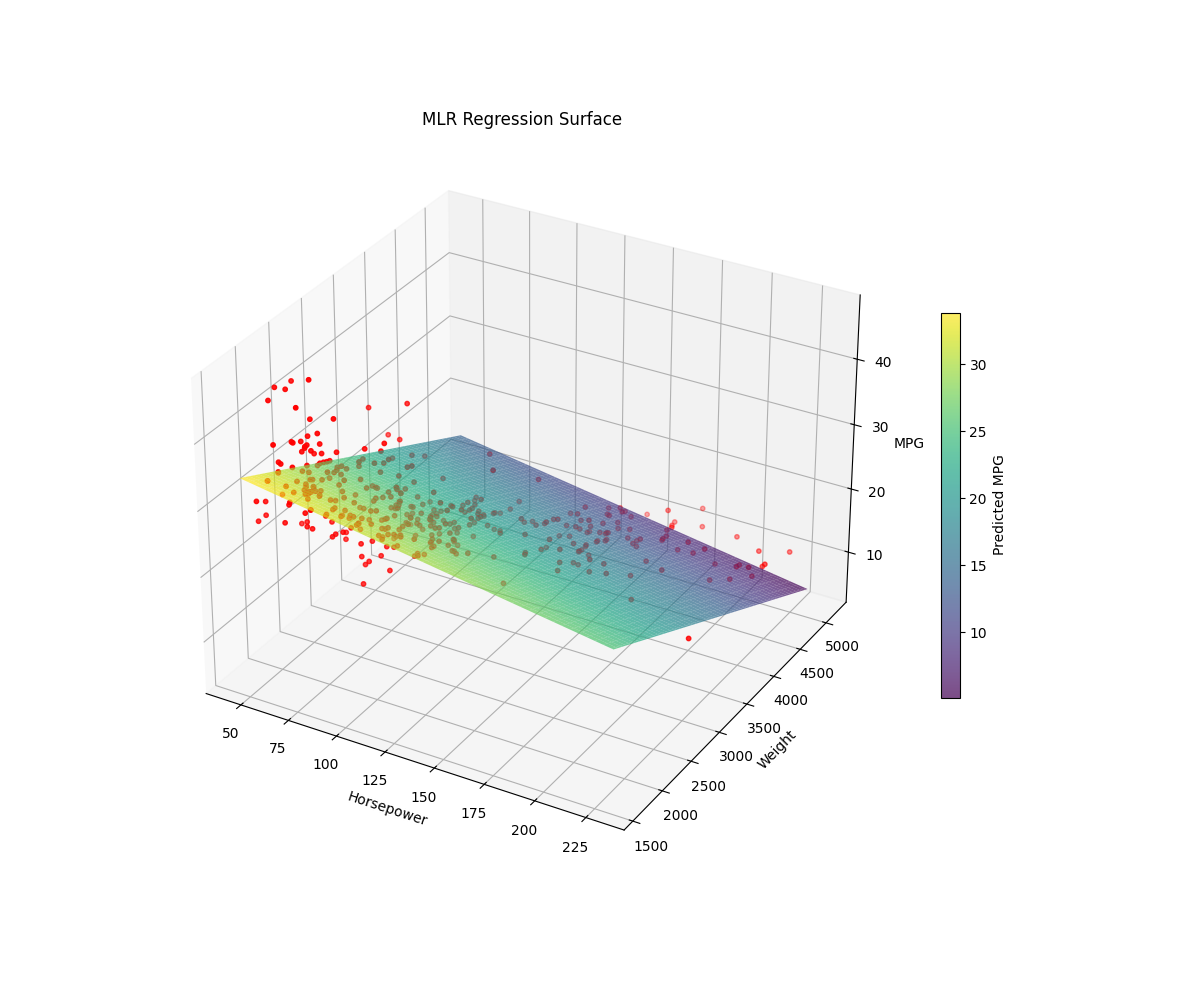

In [18]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7)

# Add a colorbar using the surface plot
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=20, label='Predicted MPG')
ax.scatter(data['horsepower'], data['weight'], data['mpg'], color='r', s=10)

ax.set_xlabel('Horsepower')
ax.set_ylabel('Weight')
ax.set_zlabel('MPG')
ax.set_title('MLR Regression Surface')

plt.show()